# 텐서(tensor)란?
- 데이터를 위한 컨테이너(container)

In [1]:
import numpy as np

## 1. 0D tensor (스칼라)
- 한개의 숫자값을 가짐.
- numpy에서는 float32, float64가 스칼라 텐서
- ndim 속성을 사용하면 넘파이 배열의 축 개수를 확인 할 수 있다. (ndim==0)
- 텐서의 축 개수를 랭크(rank)라고 부른다.

In [2]:
x = np.array(12)
x

array(12)

In [3]:
x.ndim

0

## 2. 1D tensor (벡터)
- 한 개의 축을 가지는 배열

In [4]:
# 5개의 값을 가지므로 5차원 벡터라고 한다.
x = np.array([12, 3, 6, 1, 3])
x

array([12,  3,  6,  1,  3])

In [5]:
x.ndim

1

## 3. 2D tensor (행렬)

In [8]:
x = np.array([[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [7]:
x.ndim

2

## 4. 3D tensor 또는 고차원 tensor

In [9]:
x = np.array([[[5, 79, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]],
                 [[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]],
                 [[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]]])
x

array([[[ 5, 79,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [10]:
x.ndim

3

3D 텐서들을 하나의 배열로 합치면 4D 텐서\
딥러닝에서는 보통 0D에서 4D까지의 텐서를 사용한다.\
동영상인 경우 5D 텐서까지 가기도 한다.

# 텐서 속성

- 축의 개수(랭크) : 3D->3개 축, 2D->2개 축, `ndim`으로 확인
- 크기(shape) : 텐서의 크기, 튜플로 나타냄
- 데이터 타입 : 사전 정의되어 메모리 할당할 때 사용될 타입을 지정해야함

In [11]:
from tensorflow.keras.datasets import mnist

In [12]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [13]:
# rank 확인
print(train_images.ndim)

3


In [14]:
# 크기 확인
print(train_images.shape)

(60000, 28, 28)


In [15]:
# 타입 확인
print(train_images.dtype)

uint8


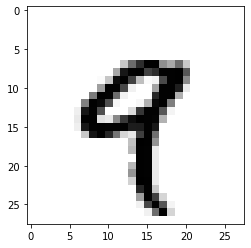

In [16]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# 넘파이로 텐서 조작
- 슬라이싱

In [17]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [20]:
# 전체 배열에서 크기 슬라이싱
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

my_slice2 = train_images[10:100, 0:28, 0:28]
print(my_slice2.shape)

(90, 28, 28)
(90, 28, 28)


In [26]:
# 이미지의 오른쪽 아래 픽셀 14 x 14만 선택?
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


# 미니 배치(mini batch)

딥러닝은 minst를 예로 60000 개 데이터를 한번에 처리하지 않는다. BATCH_SIZE = 128로 주면 60000개에서 128개씩 데이터를 잘라서 쓰겠다는 의미

# 텐서 사례
- 벡터데이터 : (samples, fatures) 크기의 2D 텐서
- 시계열 or 시퀀스 데이터 : (samples, timesteps, features) 크기의 3D 텐서
- **이미지** : (samples, height, width, channels) or (samples, channels, height, width) 크기의 4D 텐서
- 동영상 : (samples, frames, height, width, channels) or (samples, frames, channels, height, width) 크기의 5D 텐서

## 이미지 데이터
예: batch_size=128, 256x256 사이즈
- grayscale : (128, 256, 256, 1)
- color : (128, 256, 256, 3)

텐서플로우는 채널 마지막(channel-last)방식을 사용한다.
- (samples, height, width, color_depth) 방식

# 텐서 연산

## element-wise opearation

In [28]:
def naive_relu(x):
    # assert : 가정 설정문 (true면 실행, false면 에러를 발생)
    assert len(x.shape) == 2
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
            
    return x

In [29]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

numpy에서 연산을 제공
```python
z = x + y
z = np.maximum(z, 0.)
```